In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:\college\machine learning\classical ml\KNN\Mall_Customers.xls')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\arjb0\AppData\Local\Temp\ipykernel_23036\3376279292.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('C:\college\machine learning\classical ml\KNN\Mall_Customers.xls')


In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
print(df.isna().sum())
print(df.duplicated().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
0


In [5]:
df = pd.get_dummies(df,columns=['Genre'],drop_first=True)

In [6]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


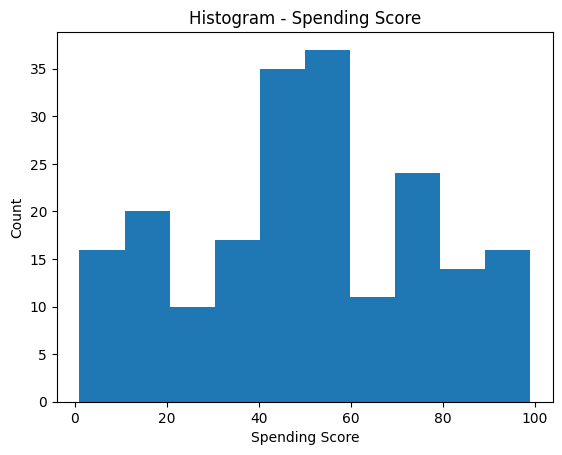

In [7]:
plt.figure()
plt.hist(df["Spending Score (1-100)"])
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.title("Histogram - Spending Score")
plt.show()

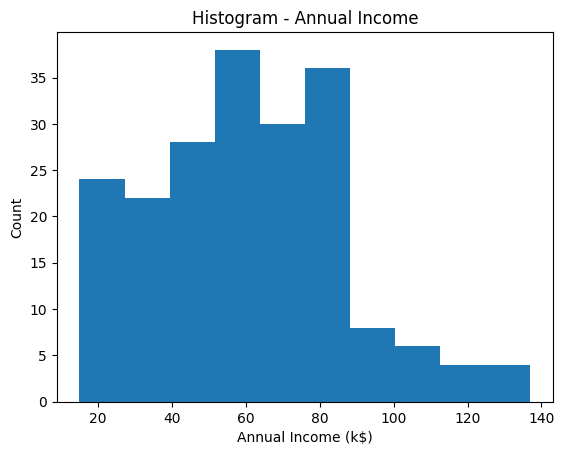

In [8]:
plt.figure()
plt.hist(df["Annual Income (k$)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.title("Histogram - Annual Income")
plt.show()

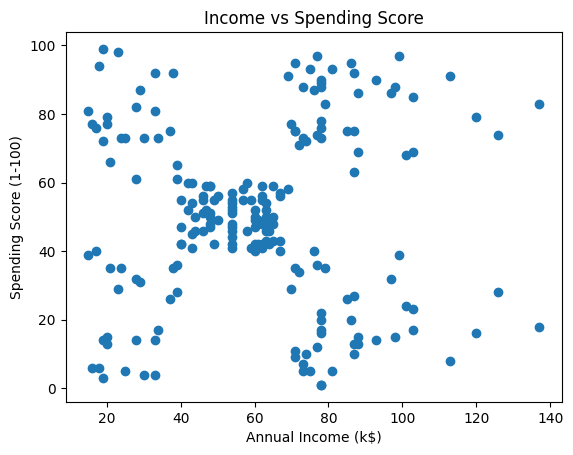

In [9]:
plt.figure()
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Income vs Spending Score")
plt.show()

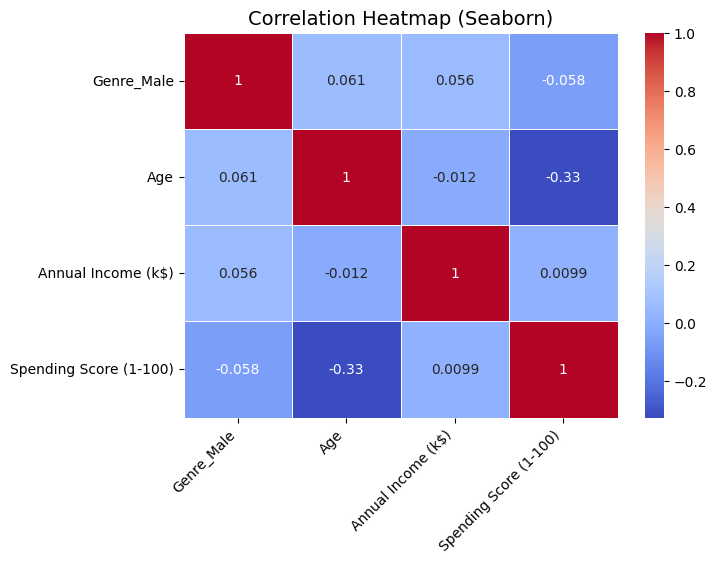

In [10]:
corr = df[["Genre_Male", "Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(
    corr,
    annot=True,    
    cmap="coolwarm",     
    linewidths=0.5,       
)

plt.title("Correlation Heatmap (Seaborn)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

In [11]:
# aplay iqr
Q1 = df["Spending Score (1-100)"].quantile(0.25)
Q3 = df["Spending Score (1-100)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Spending Score (1-100)"] >= lower_bound) & (df["Spending Score (1-100)"] <= upper_bound)]

In [12]:
def categorize(score):
    if score <= 40:
        return 0
    elif score <= 70:
        return 1
    else:
        return 2
df['Score_Class'] = df['Spending Score (1-100)'].apply(categorize)
print(df['Score_Class'].value_counts())

Score_Class
1    83
0    63
2    54
Name: count, dtype: int64


In [13]:
x = df[['Age', 'Annual Income (k$)', 'Genre_Male']]
y_class = df['Score_Class']
y_reg = df['Spending Score (1-100)']

In [14]:
x_train, x_test, y_class_train, y_class_test = train_test_split(x,
                                                                y_class,
                                                                test_size=0.2,
                                                                 random_state=42)
x_train, x_test, y_reg_train, y_reg_test = train_test_split(x,
                                                            y_reg,
                                                            test_size=0.2,
                                                             random_state=42)

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
k_class = 5
knn_clf= KNeighborsClassifier(n_neighbors=k_class)
knn_clf.fit(x_scaled,y_class_train)
y_class_pred= knn_clf.predict(x_test_scaled)

print("Classification Report:\n",classification_report(y_class_test,y_class_pred))
print("Accuracy:", accuracy_score(y_class_test,y_class_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.85      0.94      0.89        18
           2       0.60      1.00      0.75         6

    accuracy                           0.82        40
   macro avg       0.82      0.86      0.80        40
weighted avg       0.87      0.82      0.82        40

Accuracy: 0.825


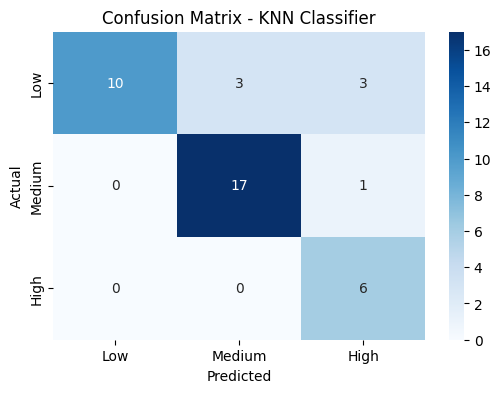

In [17]:
conf_matrix= confusion_matrix(y_class_test,y_class_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

In [ ]:
k_reg = 5
knn_reg= KNeighborsRegressor(n_neighbors=k_reg)
knn_reg.fit(x_scaled,y_reg_train)
y_reg_pred= knn_reg.predict(x_test_scaled)
print("Predicted Spending Scores:", y_reg_pred)
print("accuracy score=",accuracy_score(y_reg_test, y_reg_pred.round()))


Predicted Spending Scores: [49.4 70.2 26.4 67.8 41.6 48.  50.  42.2 31.2 59.2 39.4 49.6 72.6 47.8
 22.4 68.8 47.8 39.4 51.4 65.8 54.8 54.8 80.4 48.8 65.8 50.8 48.  48.2
 76.6 65.2 64.  29.8 36.2 61.4 54.8 38.4 69.  67.4 18.8 44.2]
accuracy score= 0.075


c:\Users\arjb0\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\arjb0\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
